# 1.Business case

- ### Liver Function and Importance:
  The liver is the largest organ in the body and plays a crucial role in digestion, energy storage, and detoxification. Malfunctioning of the liver can disrupt these functions, leading to various liver diseases.
- ### Causes of Liver Malfunction:
 Liver malfunction can be caused by factors such as viral infections (e.g., hepatitis), excessive alcohol consumption, exposure to harmful gases, and the consumption of contaminated or stale food, including pickles. Inherited diseases can also contribute to liver dysfunction.
- ### Increasing Incidence of Liver Disease:
 The incidence of liver disease is on the rise, posing a significant health challenge globally. Identifying patients with liver disease early is crucial for timely intervention and improved outcomes.
- ### Role of Machine Learning:
Machine learning can help in the early identification of patients with liver disease by evaluating vital parameters such as liver enzymes, bilirubin levels, and other biomarkers. This approach can reduce the burden on doctors by providing a more efficient and accurate means of identifying at-risk patients.

In [1]:
def outliers_iqr(df):
    
    N_col=[]
    C_col=[]
    N_col = df.select_dtypes(include='number')
    C_col = df.select_dtypes(include='object')
    for x in  N_col.columns:
        q1=df[x].quantile(0.25)
        q3=df[x].quantile(0.75)
        iqr=q3-q1
        print(x)
        outliers = df[(df[x] > q3 + (1.5 * iqr)) | (df[x] < q1 - (1.5 * iqr))]
        print(len(outliers))
        if len(outliers)==0:
            pass
        else:
            print('upper_fence :' , q3 + (1.5 * iqr))
            print('lower_fence :'  ,q1 - (1.5 * iqr))
            print(outliers[x])
        print('******************************************')
    return N_col,C_col


In [2]:
def NAN_replace(df,column_name,x):
    #x=mean,median,mode,random,nan_binary,end_distribution
    if x=='mean':
        df[column_name+'_'+x+'_replaced']=df[column_name]
        df[column_name+'_'+x+'_replaced']=df[column_name+'_'+x+'_replaced'].replace(to_replace=np.nan,value=df[column_name].mean(),inplace=False)
    if x=='median':
        df[column_name+'_'+x+'_replaced']=df[column_name]
        df[column_name+'_'+x+'_replaced']=df[column_name+'_'+x+'_replaced'].replace(to_replace=np.nan,value=df[column_name].median(),inplace=False)
    if x=='mode':
        df[column_name+'_'+x+'_replaced']=df[column_name]
        df[column_name+'_'+x+'_replaced']=df[column_name+'_'+x+'_replaced'].replace(to_replace=np.nan,value=df[column_name].mode(),inplace=False)
    if x=='random':
        df[column_name+'_random'] = df[column_name]  
        random_sample = df[column_name].dropna().sample(df[column_name].isnull().sum(), random_state=0)  
        random_sample.index = df[df['Age'].isnull()].index  
        df.loc[df2[column_name].isnull(), column_name+'_random'] = random_sample 
    if x=='nan_binary':
        df[column_name+'_nan_binary']=np.where(d[column_name].isnull(),1,0)
    if x=='end_distribution':
        df[column_name+'_end _distribution']=df[column_name].fillna(df[column_name].mean()+3*df3[column_name].std())
    

# 2. Input the dataset and domain analysis

### 2.1 Domain analysis - Analysis of the dataset's features

Age: Age of the patient. 

Gender: Gender of the patient. Categorical variable (Male/Female.

Total Bilirubin: Total bilirubin level in the patient's blNormal range is typically less than 1.2 mg/dL.od.

Direct Bilirubin: Direct bilirubin level in the patient's Normal range is typically less than 0.3 mg/dL.lood.

Alkaline Phosphotase: Level of alkaline phosphatase in the patient'Normal range is typically 20 to 140 IU/L. blood.

Alamine Aminotransferase (ALT): Level of alanine aminotransferase (ALT) in the patienNormal range is typically 7 to 56 IU/L for men and 5 to 36 IU/L for women.'s blood.

Aspartate Aminotransferase (AST): Level of aspartate aminotransferase (AST) in the patiNormal range is typically 10 to 40 IU/L.nt's blood.

Total Proteins: Total proteins level in the paNormal range is typically 6.0 to 8.3 g/dL.ient's blood.

Albumin: Albumin level in the Normal range is typically 3.5 to 5.0 g/dL.atient's blood.

Albumin_and_Globulin_Ratio: Ratio of albumin to globulin in thThe normal ratio is typically between 1.0 and 2.1. patient's blood.

Target: Indicates whether the patient has liver disease (1) or not (2).

### 2.2 Import the required libraries and dataset

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings as wn
wn.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import pickle

### 2.2.1 Import the dataset

In [4]:
raw_liver=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [5]:
print(raw_liver)
raw_liver.columns=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Target']

     65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0    62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1    62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2    58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3    72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4    46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1
..   ..    ...   ...  ...  ...  ..  ...  ...  ...   ... ..
577  60   Male   0.5  0.1  500  20   34  5.9  1.6  0.37  2
578  40   Male   0.6  0.1   98  35   31  6.0  3.2  1.10  1
579  52   Male   0.8  0.2  245  48   49  6.4  3.2  1.00  1
580  31   Male   1.3  0.5  184  29   32  6.8  3.4  1.00  1
581  38   Male   1.0  0.3  216  21   24  7.3  4.4  1.50  2

[582 rows x 11 columns]


In [6]:
raw_liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


##### 2.2.1 Inference
1) Input dataset does not have an header column.  Hence, inserted header column with appropriate feature names

# 3. Exploratory Data Analysis

## 3.1 Describe the dataset and it's features

### 3.1.1 Key parameters of numerical and categorical features

In [7]:
raw_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [8]:
raw_liver.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,582.000000,582,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.711340,NaN,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,NaN,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,NaN,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000


#### 3.1.1 Inference
- The dataset contains more data for male patients (76%) than female patients (24%).
- Outliers are detected in the columns Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase, and Total Proteins, as identified by the Interquartile Range (IQR). These outliers, being in different scales, require processing to be considered as such.
- There are 4 null values in the feature Albumin Globulin Ratio.
- The target value is imbalanced, showing a bias towards liver disease.
- None of the features have zero values.
- The dataset features are in different scales, necessitating scaling before model training.

In [9]:
outliers_iqr(raw_liver)

Age
0
******************************************
Total_Bilirubin
84
upper_fence : 5.300000000000001
lower_fence : -1.9000000000000001
0      10.9
1       7.3
21      6.8
26      6.2
36     14.2
       ... 
571    15.6
573    12.1
574    25.0
575    15.0
576    12.7
Name: Total_Bilirubin, Length: 84, dtype: float64
******************************************
Direct_Bilirubin
81
upper_fence : 2.95
lower_fence : -1.4500000000000002
0       5.5
1       4.1
21      3.0
26      3.0
36      7.8
       ... 
571     9.5
573     6.0
574    13.7
575     8.2
576     8.4
Name: Direct_Bilirubin, Length: 81, dtype: float64
******************************************
Alkaline_Phosphotase
66
upper_fence : 482.125
lower_fence : -8.875
0      699
1      490
19     610
21     542
41     630
      ... 
548    768
572    612
573    515
574    560
577    500
Name: Alkaline_Phosphotase, Length: 66, dtype: int64
******************************************
Alamine_Aminotransferase
73
upper_fence : 117.375
lower_fe

(     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
 0     62             10.9               5.5                   699   
 1     62              7.3               4.1                   490   
 2     58              1.0               0.4                   182   
 3     72              3.9               2.0                   195   
 4     46              1.8               0.7                   208   
 ..   ...              ...               ...                   ...   
 577   60              0.5               0.1                   500   
 578   40              0.6               0.1                    98   
 579   52              0.8               0.2                   245   
 580   31              1.3               0.5                   184   
 581   38              1.0               0.3                   216   
 
      Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
 0                          64                         100             7.5   
 1

### 3.1.2 Check the distribution of "Target" feature

In [10]:
raw_liver['Target'].value_counts()

Target
1    415
2    167
Name: count, dtype: int64

#### 3.1.2 Inference
- With respect to the "Target" feature, the data is unevenly distributed.
- There are 2 classes in the "Target" feature - class 1 and class 2.
- There is more data for patients with liver disease (Class 1 - 71%) than for patients without liver disease (Class 2 - 29%).
- Hence, it is necessary to balance the dataset via SMOTE before training the model.

## 3.2 Data visualization

### 3.2.1 Univariate Analysis

#### 3.2.1.1 Analysis via  sweetviz

In [11]:
import sweetviz as sv


ModuleNotFoundError: No module named 'sweetviz'

In [ ]:
raw_liver_uni_report=sv.analyze(raw_liver)

In [ ]:
raw_liver_uni_report.show_notebook()

#### 3.2.1.1 Inference

- There are 13 duplicate values in the dataset.
- Albumin and globulin ratio exhibit high skewness.
- Albumin and total proteins show a very slight negative skew.
- Aspartate aminotransferase, alanine aspartate aminotransferase, Total Bilirubin, Direct Bilirubin, and Alkaline Phosphatase are highly skewed.
- The target feature is imbalanced, with 71% of the data in class 1 and 29% in class 2.
- The target has the highest correlation with Direct Bilirubin at 25%, followed by Total Bilirubin at 22%, and the least correlation with Total Proteins at 4%.
- There seem to be outliers in most of the columns. Since each column is in a different scale, scaling the data before detecting outliers is necessary if the scales are vastly different.

#### 3.2.1.2 Analysis via Boxplot

In [16]:
raw_liver_num= raw_liver.select_dtypes(include='number')


In [17]:
raw_liver_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Total_Bilirubin             582 non-null    float64
 2   Direct_Bilirubin            582 non-null    float64
 3   Alkaline_Phosphotase        582 non-null    int64  
 4   Alamine_Aminotransferase    582 non-null    int64  
 5   Aspartate_Aminotransferase  582 non-null    int64  
 6   Total_Protiens              582 non-null    float64
 7   Albumin                     582 non-null    float64
 8   Albumin_and_Globulin_Ratio  578 non-null    float64
 9   Target                      582 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 45.6 KB


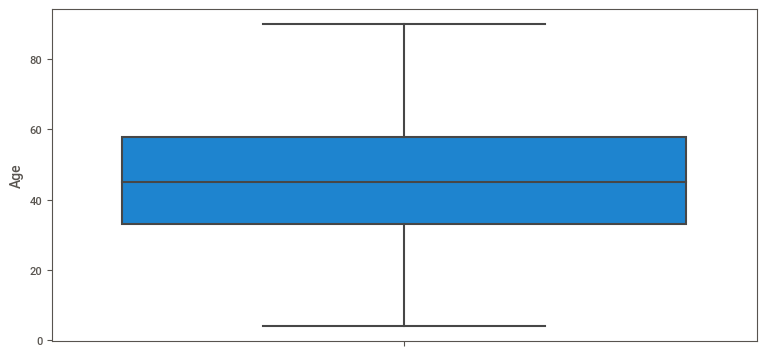

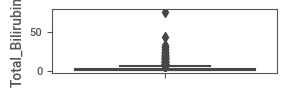

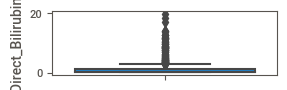

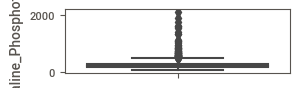

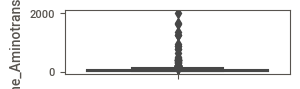

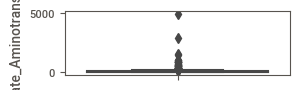

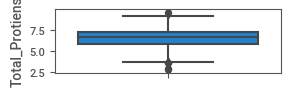

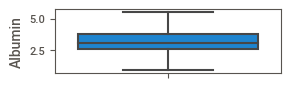

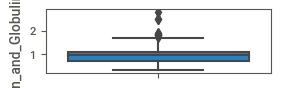

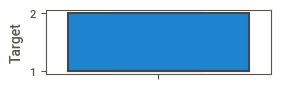

In [18]:
plt.figure(figsize=(20,25))
plt_no=1
for x in raw_liver_num:
    plt.subplot(5,2,plt_no)
    sns.boxplot(data=raw_liver,y=x)
    plt_no+=1
    plt.show()



##### 3.2.1.2 Inference
1) There are too many outliers in all features except Age and Albumin as seen in IQR method
2) Since this is medical data we need not correct any of those outlier values

### 3.2.2 Bivariate Analysis

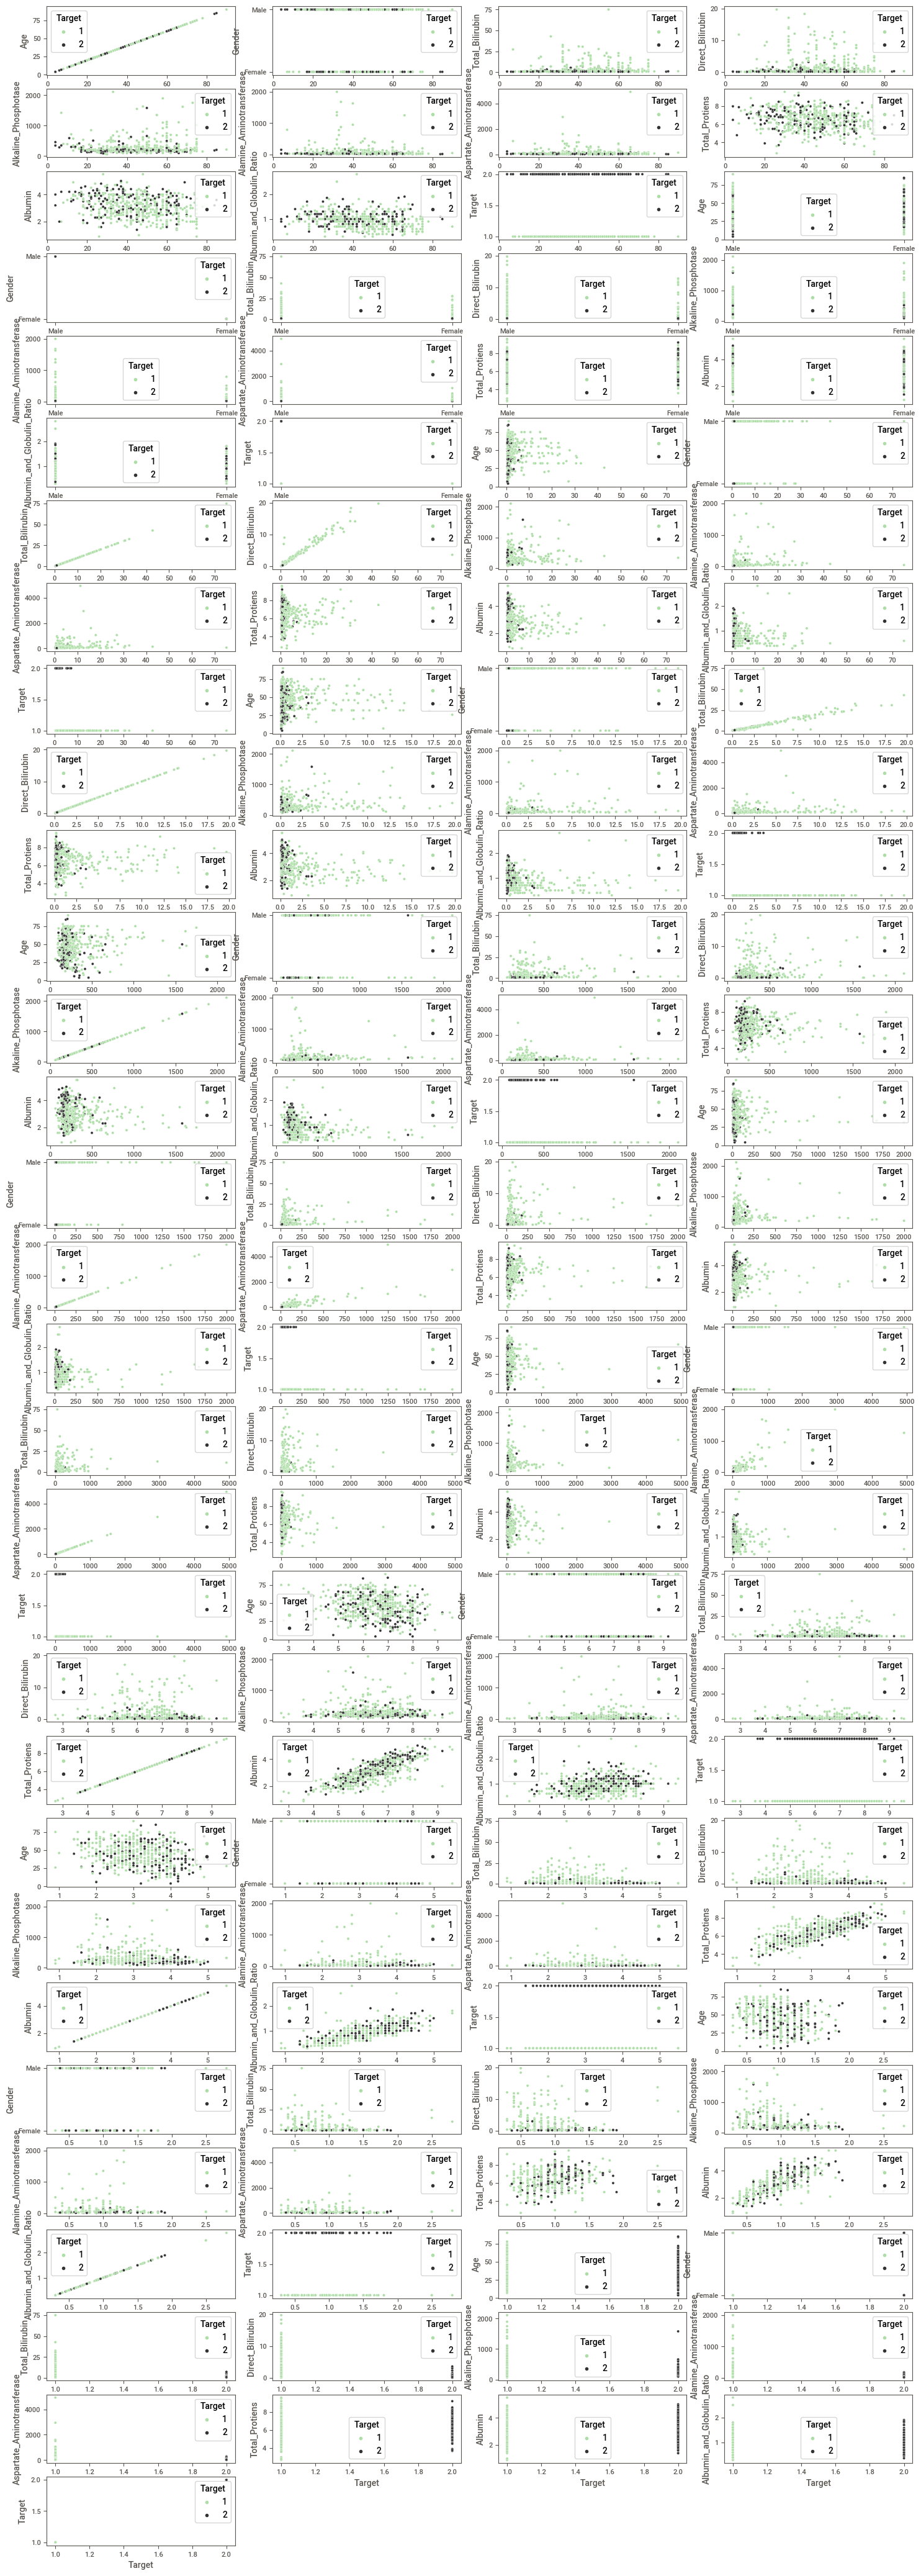

In [19]:
plt.figure(figsize=(18, 60))  
plt_no = 1
for x in raw_liver.columns:
    
    for y in raw_liver.columns:
        
        plt.subplot(35, 4, plt_no)
        sns.scatterplot(data=raw_liver, x=x, y=y, hue='Target',palette='Greens_d')
        plt.xlabel= x
        plt.ylabel=y
        plt_no += 1
plt.show() 


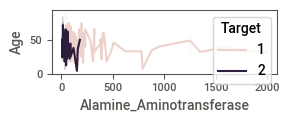

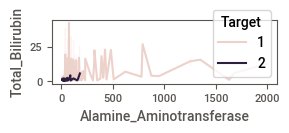

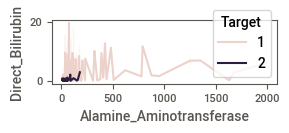

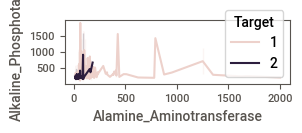

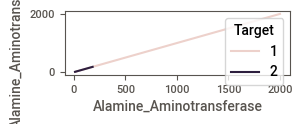

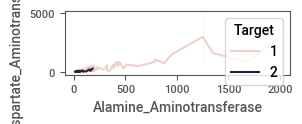

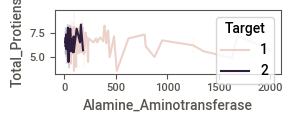

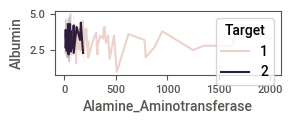

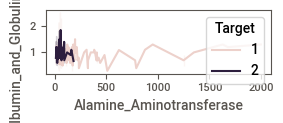

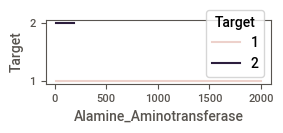

In [20]:
for y in raw_liver.select_dtypes(include='number').columns:
    x=1
    plt.subplot(5,2,x)
    sns.lineplot(data=raw_liver,y=y,x='Alamine_Aminotransferase',hue='Target')
    x+=1
    plt.show()

#### 3.2.2 Inference

- Increase in Aspartate Aminotransferase, Alanine Aminotransferase, Direct Bilirubin, and Total Bilirubin is associated with liver damage.
- Males tend to have a higher peak in Direct Bilirubin than females.
- Age does not show a consistent trend; with features like Total Proteins, Albumin, and Albumin Globulin Ratio, the likelihood of disease is random.
- In general, an increase in vital features like Direct Bilirubin, Aspartate Aminotransferase, and Alanine Aminotransferase beyond their normal range results in liver disease.
- Regarding age, an increase in the value of other features beyond their normal range mostly (~90%) results in liver disease, except for Total Proteins, Albumin, and Albumin Globulin Ratio, where the likelihood of disease is random.
- Any feature, especially Bilirubin (Total or Direct), when plotted against other features, shows a likelihood of liver disease when there is an increase beyond the normal range.
- An increase in Bilirubin, especially when plotted against other features, shows a ~90% likelihood of liver.



### 3.2.3 Multivariate analysis

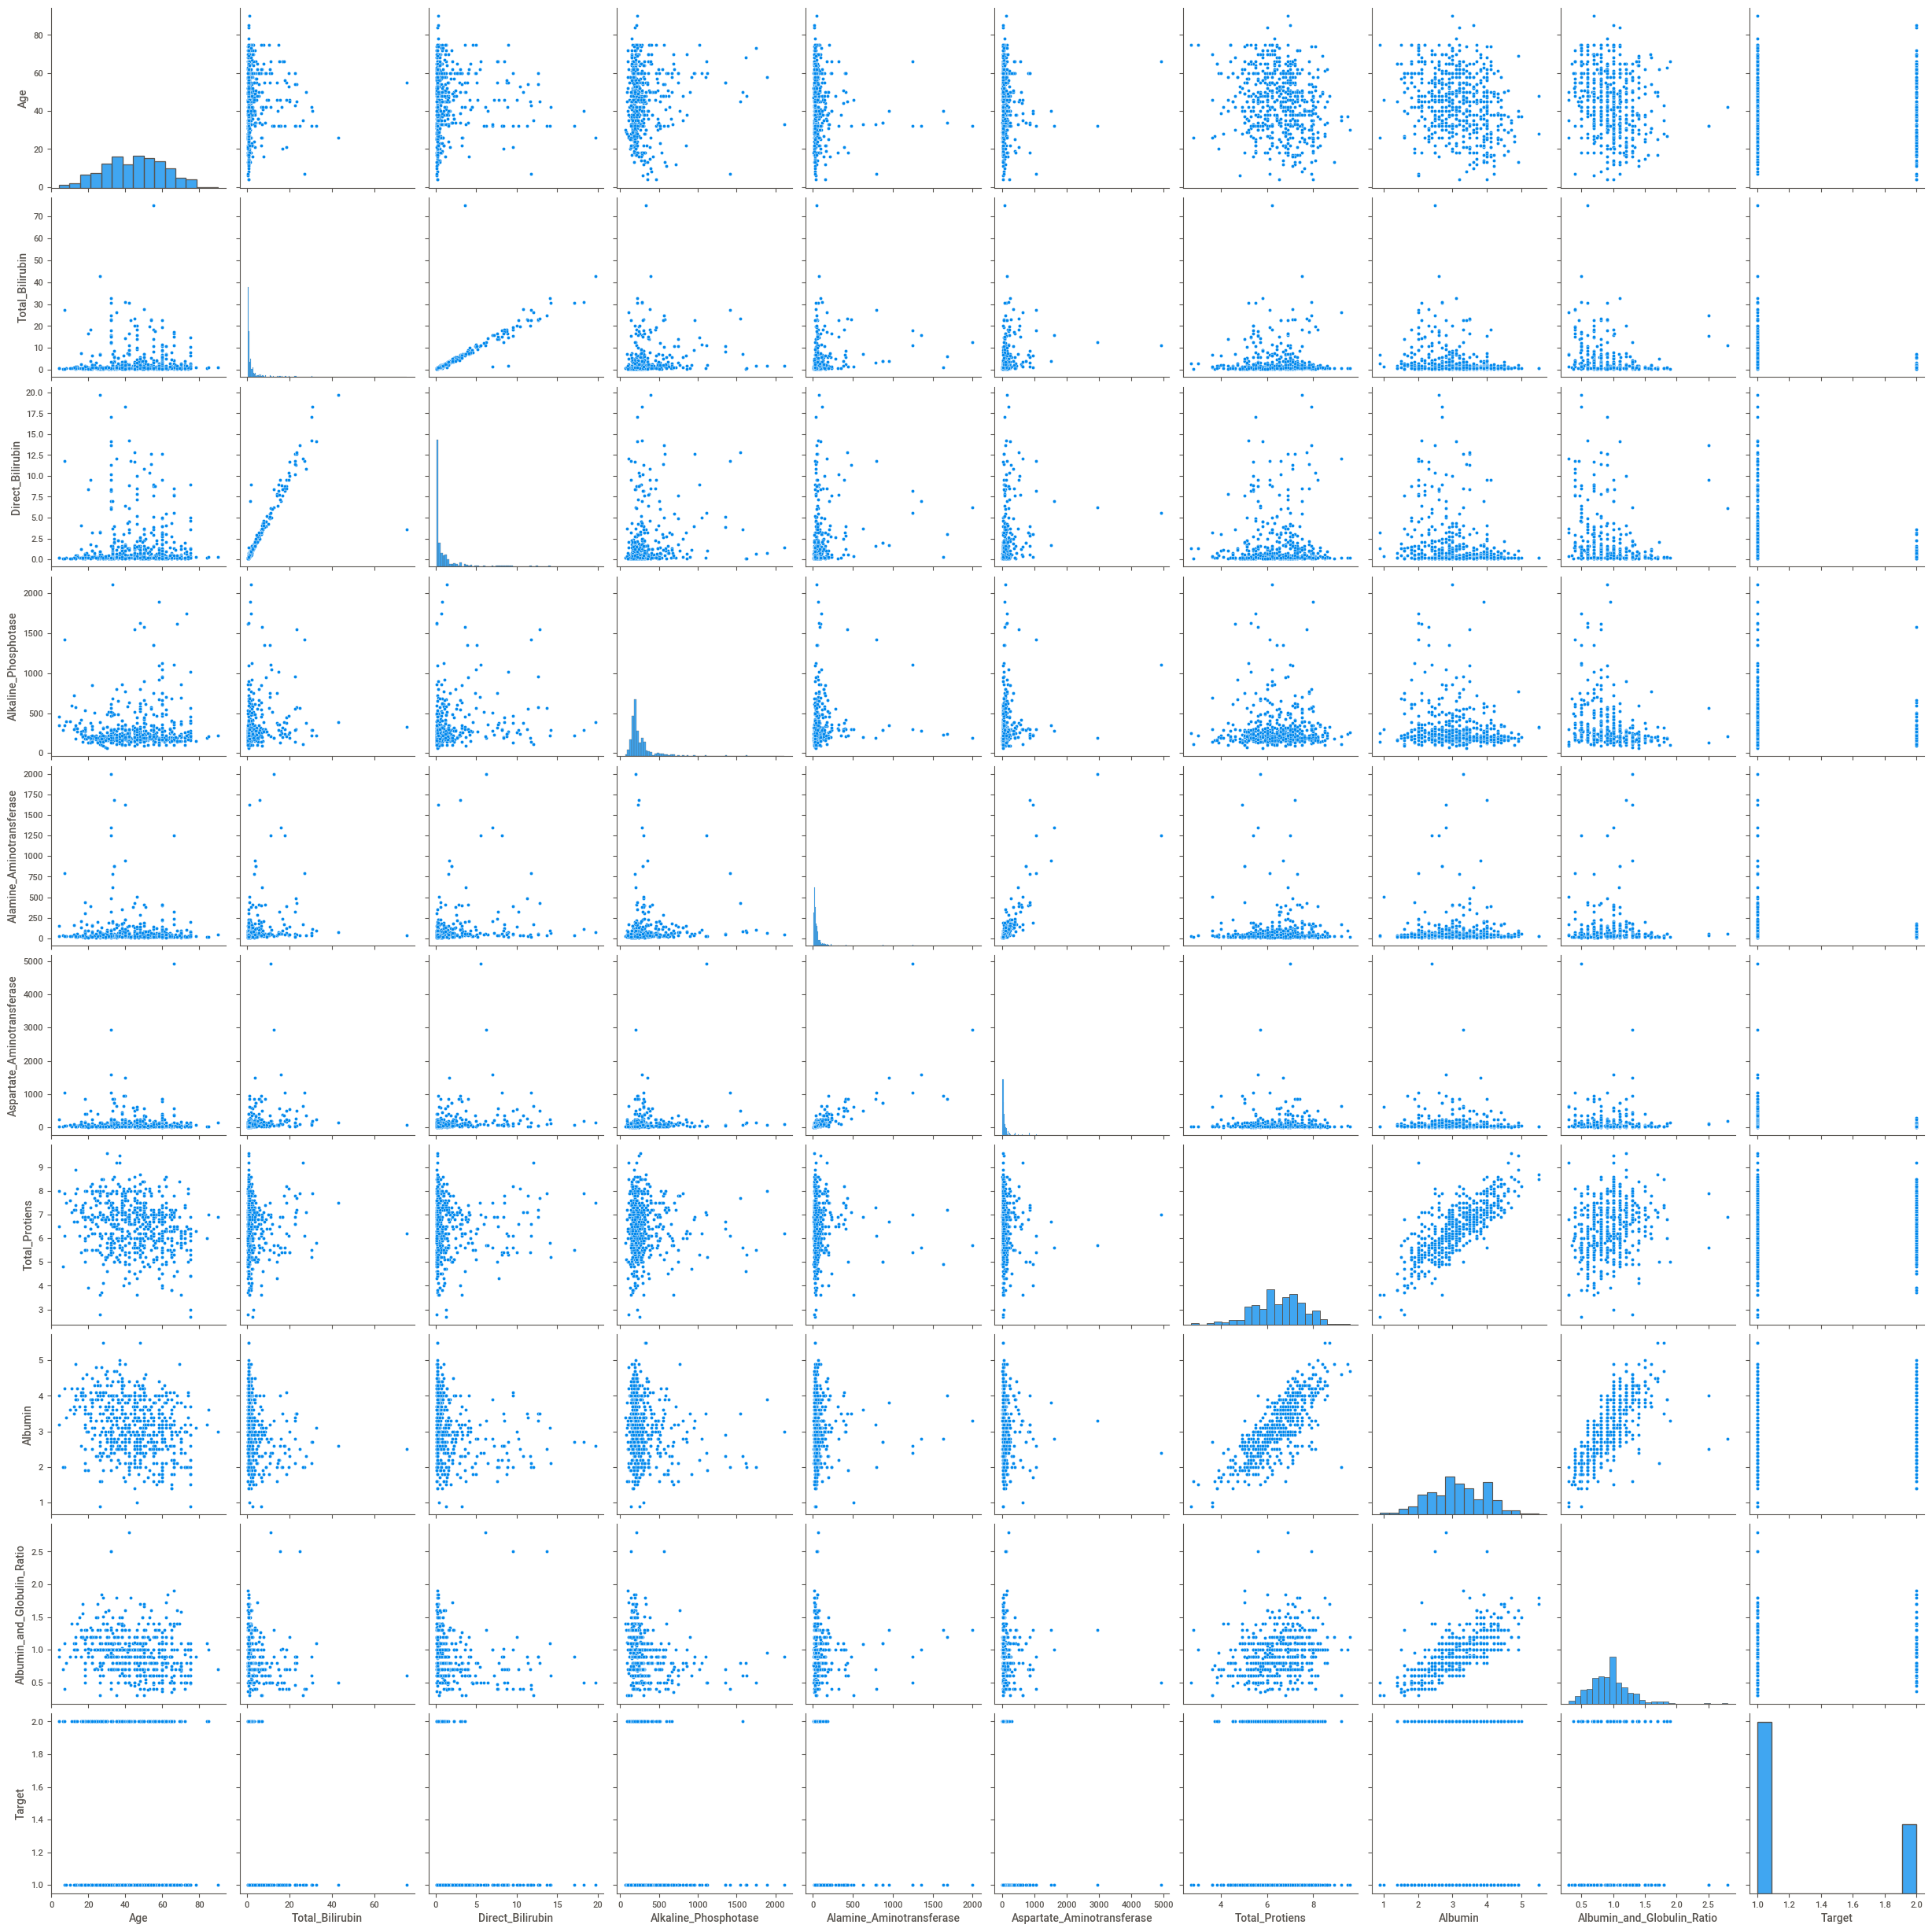

In [21]:
sns.pairplot(raw_liver, palette="bright")
plt.show()

#### 3.2.3 Inference

- Increase in Aspartate Aminotransferase, Alanine Aminotransferase, Direct Bilirubin, and Total Bilirubin is associated with liver damage.
- Males tend to have a higher peak in Direct Bilirubin than females.
- Age does not show a consistent trend; with features like Total Proteins, Albumin, and Albumin Globulin Ratio, the likelihood of disease is random.
- In general, an increase in vital features like Direct Bilirubin, Aspartate Aminotransferase, and Alanine Aminotransferase beyond their normal range results in liver disease.
- Regarding age, an increase in the value of other features beyond their normal range mostly (~90%) results in liver disease, except for Total Proteins, Albumin, and Albumin Globulin Ratio, where the likelihood of disease is random.
- Any feature, especially Bilirubin (Total or Direct), when plotted against other features, shows a likelihood of liver disease when there is an increase beyond the normal range.
- An increase in Bilirubin, especially when plotted against other features, shows a ~90% likelihood of liver.

# 4. Data pre-processing

In [7]:
copy_raw=raw_liver.copy()

## 4.1 null values

In [8]:
copy_raw.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [9]:
copy_raw[copy_raw.isnull().any(axis=1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [10]:
NAN_replace(copy_raw,'Albumin_and_Globulin_Ratio','median')

<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

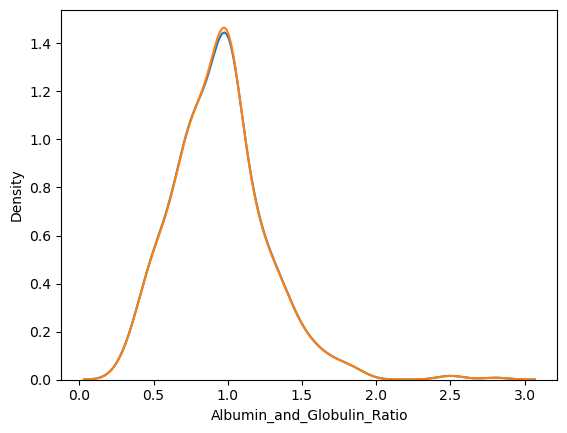

In [11]:
sns.kdeplot(data=copy_raw,x='Albumin_and_Globulin_Ratio')
sns.kdeplot(data=copy_raw,x='Albumin_and_Globulin_Ratio_median_replaced')

In [12]:
copy_raw['Albumin_and_Globulin_Ratio'].std()

0.3198629196001938

In [13]:
copy_raw['Albumin_and_Globulin_Ratio_median_replaced'].std()

0.3187604883001483

In [14]:
copy_raw=copy_raw.drop(columns='Albumin_and_Globulin_Ratio')

In [15]:
copy_raw.isnull().sum()

Age                                           0
Gender                                        0
Total_Bilirubin                               0
Direct_Bilirubin                              0
Alkaline_Phosphotase                          0
Alamine_Aminotransferase                      0
Aspartate_Aminotransferase                    0
Total_Protiens                                0
Albumin                                       0
Target                                        0
Albumin_and_Globulin_Ratio_median_replaced    0
dtype: int64

#### 4.1 Inference
- The NaN values in the 'Albumin_and_Globulin Ratio' column is replaced with the median to ensure consistency with the overall distribution of the data.
- This decision was made because using the median helps maintain the standard deviation of the column, as seen in the comparison between the original and modified data.

## 4.2 categorical value to numerical value

In [16]:
copy_raw['Gender_binary']=copy_raw['Gender'].replace({'Male':1,'Female':0})

In [17]:
copy_raw.drop(columns='Gender',inplace=True)

In [18]:
copy_raw.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Target',
       'Albumin_and_Globulin_Ratio_median_replaced', 'Gender_binary'],
      dtype='object')

In [19]:
raw_liver=copy_raw

In [20]:
raw_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         582 non-null    int64  
 1   Total_Bilirubin                             582 non-null    float64
 2   Direct_Bilirubin                            582 non-null    float64
 3   Alkaline_Phosphotase                        582 non-null    int64  
 4   Alamine_Aminotransferase                    582 non-null    int64  
 5   Aspartate_Aminotransferase                  582 non-null    int64  
 6   Total_Protiens                              582 non-null    float64
 7   Albumin                                     582 non-null    float64
 8   Target                                      582 non-null    int64  
 9   Albumin_and_Globulin_Ratio_median_replaced  582 non-null    float64
 10  Gender_binary 

#### 4.2 Inference
- categorical feature is converted to  numerical feature by Ordinal Number Encoding

## 4.3 processing the duplicates

In [21]:
raw_liver.duplicated().sum()

13

In [22]:
liver_data.drop_duplicates(inplace=True)

NameError: name 'liver_data' is not defined

In [25]:
raw_liver[raw_liver.duplicated()]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Target,Albumin_and_Globulin_Ratio_median_replaced,Gender_binary
18,40,0.9,0.3,293,232,245,6.8,3.1,1,0.80,0
25,34,4.1,2.0,289,875,731,5.0,2.7,1,1.10,1
33,38,2.6,1.2,410,59,57,5.6,3.0,2,0.80,0
54,42,8.9,4.5,272,31,61,5.8,2.0,1,0.50,1
61,58,1.0,0.5,158,37,43,7.2,3.6,1,1.00,1
105,36,5.3,2.3,145,32,92,5.1,2.6,2,1.00,1
107,36,0.8,0.2,158,29,39,6.0,2.2,2,0.50,1
137,18,0.8,0.2,282,72,140,5.5,2.5,1,0.80,1
142,30,1.6,0.4,332,84,139,5.6,2.7,1,0.90,1
157,72,0.7,0.1,196,20,35,5.8,2.0,1,0.50,1


In [26]:
raw_liver.drop_duplicates(inplace=True)

##### 4.3 Inference
- Duplicate values are removed from the input data

# 5. Feature engineering

## 5.1 train test split

In [27]:
x=raw_liver.drop(columns='Target')
y=raw_liver['Target']
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.25,random_state=47)
print(trainx.shape  ,  trainy.shape)
print(testx.shape  ,   testy.shape)

(426, 10) (426,)
(143, 10) (143,)


## 5.1 feature selection

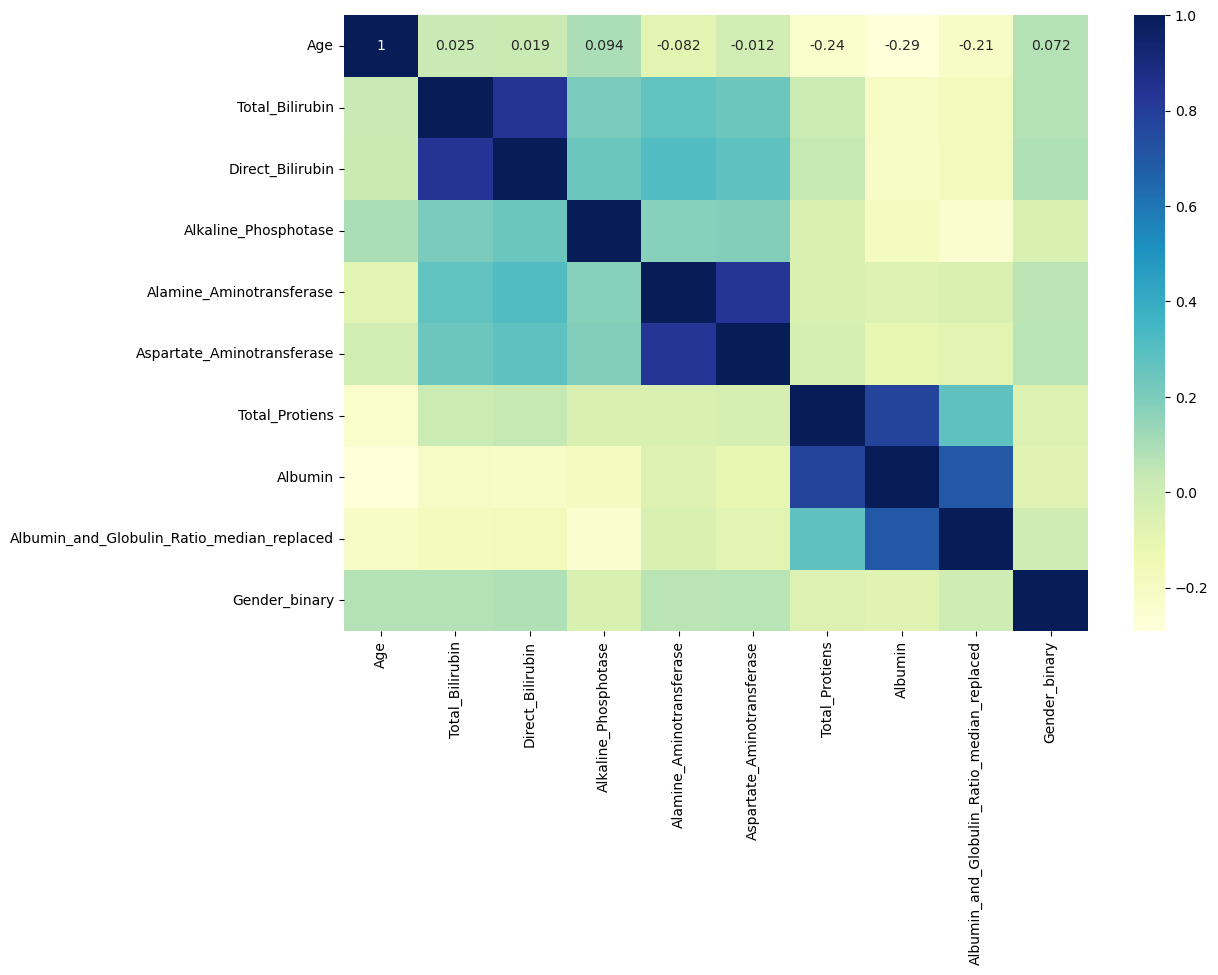

In [28]:

# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(data=trainx.corr(), annot=True, cmap='YlGnBu')
plt.show()



,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio_median_replaced,Gender_binary
Age,1.000000,0.024907,0.018821,0.094029,-0.081541,-0.011713,-0.237907,-0.291179,-0.214209,0.072384
Total_Bilirubin,0.024907,1.000000,0.834904,0.207389,0.269236,0.243021,0.016237,-0.209902,-0.175563,0.073881
Direct_Bilirubin,0.018821,0.834904,1.000000,0.248346,0.309865,0.275809,0.034476,-0.215760,-0.164258,0.086650
Alkaline_Phosphotase,0.094029,0.207389,0.248346,1.000000,0.174099,0.185149,-0.048534,-0.193077,-0.247547,-0.042347
Alamine_Aminotransferase,-0.081541,0.269236,0.309865,0.174099,1.000000,0.833043,-0.043863,-0.060308,-0.041843,0.059721
Aspartate_Aminotransferase,-0.011713,0.243021,0.275809,0.185149,0.833043,1.000000,-0.024992,-0.100874,-0.083700,0.063350
Total_Protiens,-0.237907,0.016237,0.034476,-0.048534,-0.043863,-0.024992,1.000000,0.780833,0.276481,-0.054395
Albumin,-0.291179,-0.209902,-0.215760,-0.193077,-0.060308,-0.100874,0.780833,1.000000,0.701987,-0.074827
Albumin_and_Globulin_Ratio_median_replaced,-0.214209,-0.175563,-0.164258,-0.247547,-0.041843,-0.083700,0.276481,0.701987,1.000000,0.003866
Gender_binary,0.072384,0.073881,0.086650,-0.042347,0.059721,0.063350,-0.054395,-0.074827,0.003866,1.000000


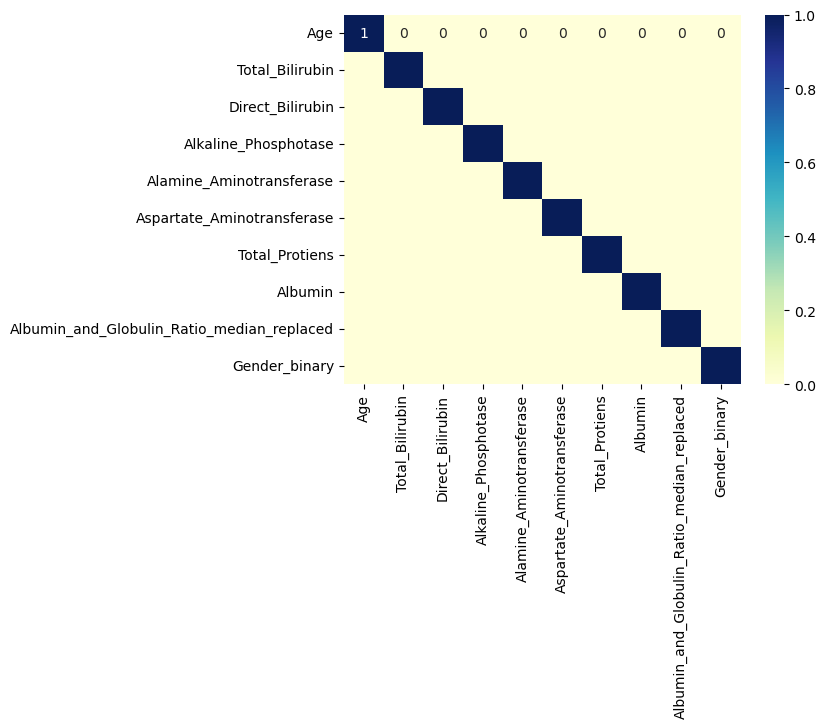

In [29]:
sns.heatmap(data=trainx.corr()>0.9, annot=True, cmap='YlGnBu')
trainx.corr()

In [30]:
testx.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio_median_replaced', 'Gender_binary'],
      dtype='object')

In [31]:
trainx.drop(columns='Total_Bilirubin',axis=1,inplace=True)


In [32]:
testx.drop(columns='Total_Bilirubin',axis=1,inplace=True)

There is Multi-Collinearity found on our dataset.

- Multicollinearity betwwen 'Total_Bilirubin' and 'Direct_Bilirubin' is 0.97%
- Multicollinearity betwwen 'Alamine_Aminotransferase' and 'Aspartate_Aminotransferase' **is **0.83%
- Multicollinearity betwwen 'Total_Protiens' and 'Albumin' is 0.76%
- Multicollinearity betwwen 'Albumin' and 'Albumin_and_Globulin_Ratio' is 0.66%
- Usually we drop that feature which has above 0.90% multicollinearity between two independent feature. Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.97% mutlicollinearity. So we drop one of the feature from them and other independent feature has less multicollinearity, less than 0.90% So we keep that feature.

### Feature Selection- Dropping constant features

In [33]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(trainx)

VarianceThreshold(threshold=0)

In [34]:
con_column=[z for z in trainx.columns
            if z not in trainx.columns[var_thres.get_support()]]

In [35]:
con_column

[]

## 5.2 Scale the features

In [38]:
!pip install --upgrade scikit-learn


In [39]:
!pip install --upgrade imbalanced-learn


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 131.3 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.3 kB 131.3 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.3 kB 182.2 kB/s eta 0:00:02
   ------------ -------------------------- 81.9/258.3 kB 229.7 kB/s eta 0:00:01
   ---------------- -----------------

In [40]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek()
smot_trainx,smot_trainy=sm.fit_resample(trainx,trainy)
print(trainy.value_counts())
print(smot_trainy.value_counts())

Target
1    298
2    128
Name: count, dtype: int64
Target
2    279
1    279
Name: count, dtype: int64


In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
smot_scl_trainx=ss.fit_transform(smot_trainx)
scl_testx=ss.transform(testx)

In [36]:
from sklearn.preprocessing import StandardScaler

In [42]:
scl_testx

array([[ 0.86738499, -0.17192188, -0.40326611, ...,  0.37246945,
         1.3892063 ,  0.74161985],
       [ 1.85375784, -0.37505012, -0.21092847, ...,  1.00075831,
         0.11247233, -1.34839972],
       [ 1.11397821, -0.33442447, -0.37399734, ...,  0.74944277,
         1.7083898 ,  0.74161985],
       ...,
       [ 0.9906816 ,  0.03120637, -0.22765348, ..., -1.51239713,
        -1.48344514,  0.74161985],
       [-0.92041579, -0.37505012, -0.34472857, ...,  0.49812722,
         0.43165582, -1.34839972],
       [ 0.25090196, -0.41567577, -0.56215372, ...,  0.87510054,
         0.11247233, -1.34839972]])

#  6 Model selection 

In [43]:
model_metrics = {
    'model': [],
    'f1_score': [],
    'accuracy': [],    
    'precision': [],
    'recall': [],
    'confusion matrix':[]
   
}


In [55]:
model_metrics

{'model': [],
 'f1_score': [],
 'accuracy': [],
 'precision': [],
 'recall': [],
 'confusion matrix': []}

## 6.1 logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score
log_reg=LogisticRegression(random_state=47)
log_reg.fit(smot_scl_trainx,smot_trainy)
ypred_logr=log_reg.predict(scl_testx)


print('f1_score        ',f1_score(ypred_logr,testy))
print('accuracy_score  ',accuracy_score(ypred_logr,testy))
print('precision_score ',precision_score(ypred_logr,testy))
print('recall_score    ',recall_score(ypred_logr,testy))
#print("ROC-AUC Score   ", roc_auc_score(ypred_logr,testy))
print('classification_report')
print(classification_report(ypred_logr,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_logr,testy))

model_metrics['model'].append('LogisticRegression_without_hyperparameter')
model_metrics['accuracy'].append(accuracy_score(ypred_logr, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_logr, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_logr, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_logr, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_logr,testy).tolist())
#model_metrics['roc_auc_score'].append(roc_auc_score(ypred_logr,testy).round(2)*100)


f1_score         0.7826086956521738
accuracy_score   0.7202797202797203
precision_score  0.6728971962616822
recall_score     0.935064935064935
classification_report
              precision    recall  f1-score   support

           1       0.67      0.94      0.78        77
           2       0.86      0.47      0.61        66

    accuracy                           0.72       143
   macro avg       0.77      0.70      0.70       143
weighted avg       0.76      0.72      0.70       143

confusion_matrix
[[72  5]
 [35 31]]


### 6.1.2 logistic regression using RandomizedSearchCV

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
log_reg_hpt=LogisticRegression()

grid={
    'C': uniform(0.001, 1000), 
    'penalty': ['l1', 'l2','elasticnet'],
    'solver': ['liblinear', 'saga'],
'max_iter':list(np.arange(15)*100)}
log_rcv=RandomizedSearchCV(estimator=log_reg_hpt,param_distributions=grid,cv=5,scoring='accuracy',n_jobs=-1,random_state=10)
log_rcv.fit(smot_scl_trainx,smot_trainy)
print(log_rcv.best_params_)


{'C': 771.3216432667459, 'max_iter': 400, 'penalty': 'l1', 'solver': 'saga'}


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
log_reg_hpt = LogisticRegression(C=25.172, max_iter=1000, penalty='l1', solver='saga')
log_reg_hpt.fit(smot_scl_trainx,smot_trainy)
ypred_logr_hpt=log_reg_hpt.predict(scl_testx)


print('f1_score        ',f1_score(ypred_logr_hpt,testy))
print('accuracy_score  ',accuracy_score(ypred_logr_hpt,testy))
print('precision_score ',precision_score(ypred_logr_hpt,testy))
print('recall_score    ',recall_score(ypred_logr_hpt,testy))
print('classification_report')
print(classification_report(ypred_logr_hpt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_logr_hpt,testy))


model_metrics['model'].append('LogisticRegression_with_hyperparameter')
model_metrics['accuracy'].append(accuracy_score(ypred_logr_hpt, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_logr_hpt, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_logr_hpt, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_logr_hpt, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_logr_hpt,testy).tolist())

f1_score         0.7868852459016392
accuracy_score   0.7272727272727273
precision_score  0.6728971962616822
recall_score     0.9473684210526315
classification_report
              precision    recall  f1-score   support

           1       0.67      0.95      0.79        76
           2       0.89      0.48      0.62        67

    accuracy                           0.73       143
   macro avg       0.78      0.71      0.70       143
weighted avg       0.77      0.73      0.71       143

confusion_matrix
[[72  4]
 [35 32]]


### 6.1.1 logistic regression using GridSearchCV(no need-delete)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg_hpt=LogisticRegression(random_state=47)

grid={'penalty':['l1','l2','elasticnet'],
      'C': list(np.arange(6)*5),
      'solver': ['liblinear', 'saga'],
      'max_iter':[1000,100,500,750]}
log_cv=GridSearchCV(estimator=log_reg_hpt,param_grid=grid,cv=9,scoring='accuracy',n_jobs=-1)
log_cv.fit(smot_scl_trainx,smot_trainy)
print(log_cv.best_params_)


{'C': 5, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
log_reg_hpt = LogisticRegression(C=5, max_iter=1000, penalty='l1', solver='liblinear',random_state=37)
log_reg_hpt.fit(smot_scl_trainx,smot_trainy)
ypred_logr_hpt=log_reg_hpt.predict(scl_testx)


print('f1_score        ',f1_score(ypred_logr_hpt,testy))
print('accuracy_score  ',accuracy_score(ypred_logr_hpt,testy))
print('precision_score ',precision_score(ypred_logr_hpt,testy))
print('recall_score    ',recall_score(ypred_logr_hpt,testy))
print('classification_report')
print(classification_report(ypred_logr_hpt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_logr_hpt,testy))





f1_score         0.7868852459016392
accuracy_score   0.7272727272727273
precision_score  0.6728971962616822
recall_score     0.9473684210526315
classification_report
              precision    recall  f1-score   support

           1       0.67      0.95      0.79        76
           2       0.89      0.48      0.62        67

    accuracy                           0.73       143
   macro avg       0.78      0.71      0.70       143
weighted avg       0.77      0.73      0.71       143

confusion_matrix
[[72  4]
 [35 32]]


## 6.2 Decision Tree


### 6.2.1 Decision Tree using GridSearchCV

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()


d_grid={'criterion':['gini','entropy','log_loss'],
        'splitter':['best', 'random'],
        "max_depth": (list(range(1,20))),
        "min_samples_split": [2,3,4,5],
        
        "min_samples_leaf": (list(range(1,20)))}

dtree_cv=GridSearchCV(dtree,d_grid,scoring='accuracy',n_jobs=-1,refit=True,cv=5,verbose=2)
dtree_cv.fit(smot_scl_trainx,smot_trainy)
print(dtree_cv.best_params_)

        
        

Fitting 5 folds for each of 8664 candidates, totalling 43320 fits
{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [62]:
dtree_m=DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=1,min_samples_split=4,splitter='best',random_state=10)
dtree_m.fit(smot_scl_trainx,smot_trainy)
ypred_dt=dtree_m.predict(scl_testx)

print('f1_score        ',f1_score(ypred_dt,testy))
print('accuracy_score  ',accuracy_score(ypred_dt,testy))
print('precision_score ',precision_score(ypred_dt,testy))
print('recall_score    ',recall_score(ypred_dt,testy))
print('classification_report')
print(classification_report(ypred_dt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,testy))


f1_score         0.7684729064039408
accuracy_score   0.6713286713286714
precision_score  0.7289719626168224
recall_score     0.8125
classification_report
              precision    recall  f1-score   support

           1       0.73      0.81      0.77        96
           2       0.50      0.38      0.43        47

    accuracy                           0.67       143
   macro avg       0.61      0.60      0.60       143
weighted avg       0.65      0.67      0.66       143

confusion_matrix
[[78 18]
 [29 18]]


### 6.2.2 Decision Tree using RandomizedSearchCV

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()


d_grid={'criterion':['gini','entropy','log_loss'],
        'splitter':['best', 'random'],
        "max_depth": (list(range(1,100))),
        "min_samples_split": [2,3,4,5],
        
        "min_samples_leaf": [1,2,3]}

dtree_cv=RandomizedSearchCV(dtree,d_grid,scoring='accuracy',n_jobs=-1,refit=True,cv=5,verbose=2)
dtree_cv.fit(smot_scl_trainx,smot_trainy)
print(dtree_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'splitter': 'random', 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 21, 'criterion': 'entropy'}


In [64]:
dtree_m=DecisionTreeClassifier(criterion='log_loss',max_depth=69,min_samples_leaf=2,min_samples_split=3,splitter='best',random_state=37)
dtree_m.fit(smot_scl_trainx,smot_trainy)
ypred_dt=dtree_m.predict(scl_testx)

print('f1_score        ',f1_score(ypred_dt,testy))
print('accuracy_score  ',accuracy_score(ypred_dt,testy))
print('precision_score ',precision_score(ypred_dt,testy))
print('recall_score    ',recall_score(ypred_dt,testy))
print('classification_report')
print(classification_report(ypred_dt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,testy))


model_metrics['model'].append('Decision Tree using RandomizedSearchCV')
model_metrics['accuracy'].append(accuracy_score(ypred_dt, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_dt, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_dt, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_dt, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_dt,testy).tolist())

f1_score         0.7981220657276995
accuracy_score   0.6993006993006993
precision_score  0.794392523364486
recall_score     0.8018867924528302
classification_report
              precision    recall  f1-score   support

           1       0.79      0.80      0.80       106
           2       0.42      0.41      0.41        37

    accuracy                           0.70       143
   macro avg       0.61      0.60      0.60       143
weighted avg       0.70      0.70      0.70       143

confusion_matrix
[[85 21]
 [22 15]]


## 6.3 Random Forest

### 6.3.1 Random Forest using RandomizedSearchCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
r_grid={'n_estimators' : [int(x) for x in np.linspace(200,2000,10)],
    'max_features' : ["sqrt", "log2", None],
    'max_depth' : [int(y) for y in np.linspace(start=10, stop=110, num=10)],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap' : [True, False]
    }
r_grid_cv=RandomizedSearchCV(estimator=rforest,param_distributions=r_grid,scoring='f1',n_jobs=-1,refit=True,cv=5,verbose=2,random_state=10)
r_grid_cv.fit(smot_scl_trainx,smot_trainy)
print(r_grid_cv.best_params_)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 87, 'bootstrap': False}


In [66]:
rforest_m=RandomForestClassifier(n_estimators=800, min_samples_split=2, min_samples_leaf=2,
                                      max_features="sqrt", max_depth=87, bootstrap=False,  random_state=10)
rforest_m.fit(smot_scl_trainx,smot_trainy)
ypred_dt=rforest_m.predict(scl_testx)

print('f1_score        ',f1_score(ypred_dt,testy))
print('accuracy_score  ',accuracy_score(ypred_dt,testy))
print('precision_score ',precision_score(ypred_dt,testy))
print('recall_score    ',recall_score(ypred_dt,testy))
print('classification_report')
print(classification_report(ypred_dt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,testy))

model_metrics['model'].append('Random Forest using RandomizedSearchCV')
model_metrics['accuracy'].append(accuracy_score(ypred_dt, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_dt, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_dt, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_dt, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_dt,testy).tolist())

f1_score         0.815165876777251
accuracy_score   0.7272727272727273
precision_score  0.8037383177570093
recall_score     0.8269230769230769
classification_report
              precision    recall  f1-score   support

           1       0.80      0.83      0.82       104
           2       0.50      0.46      0.48        39

    accuracy                           0.73       143
   macro avg       0.65      0.64      0.65       143
weighted avg       0.72      0.73      0.72       143

confusion_matrix
[[86 18]
 [21 18]]


### 6.3.2 Random Forest using GridSearchCV

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
r_grid={'n_estimators' : list(np.arange(start=100, stop=1100, step=100)),
    'max_features' : ["sqrt", "log2", None],
    'max_depth' : [int(y) for y in np.linspace(start=70, stop=100, num=5)],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap' : [True, False]
       }
r_grid_cv_1=GridSearchCV(estimator=rforest,param_grid=r_grid,scoring='f1',n_jobs=-1,refit=True,cv=5,verbose=2)
r_grid_cv_1.fit(smot_scl_trainx,smot_trainy)
print(r_grid_cv_1.best_params_)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits



KeyboardInterrupt



In [68]:
rforest_m=RandomForestClassifier(n_estimators=800, min_samples_split=2, min_samples_leaf=2,
                                      max_features="sqrt", max_depth=87, bootstrap=False,  random_state=10)
rforest_m.fit(smot_scl_trainx,smot_trainy)
ypred_dt=rforest_m.predict(scl_testx)

print('f1_score        ',f1_score(ypred_dt,testy))
print('accuracy_score  ',accuracy_score(ypred_dt,testy))
print('precision_score ',precision_score(ypred_dt,testy))
print('recall_score    ',recall_score(ypred_dt,testy))
print('classification_report')
print(classification_report(ypred_dt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,testy))





f1_score         0.815165876777251
accuracy_score   0.7272727272727273
precision_score  0.8037383177570093
recall_score     0.8269230769230769
classification_report
              precision    recall  f1-score   support

           1       0.80      0.83      0.82       104
           2       0.50      0.46      0.48        39

    accuracy                           0.73       143
   macro avg       0.65      0.64      0.65       143
weighted avg       0.72      0.73      0.72       143

confusion_matrix
[[86 18]
 [21 18]]


## 6.4 SVM

In [69]:
from sklearn.svm import SVC
svc=SVC()
grid={'C':list(np.arange(start=0.001, stop=1, step=0.005)) + list(np.arange(start=1, stop=10, step=0.5)),
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'random_state': list(range(0,100))    
}
svm_cv=RandomizedSearchCV(estimator=svc,param_distributions=grid,n_iter=8,cv=7,random_state=47,verbose=1,scoring='f1')
svm_cv.fit(smot_scl_trainx,smot_trainy)


Fitting 7 folds for each of 8 candidates, totalling 56 fits


RandomizedSearchCV(cv=7, estimator=SVC(), n_iter=8,
                   param_distributions={'C': [0.001, 0.006, 0.011, 0.016, 0.021,
                                              0.026000000000000002, 0.031,
                                              0.036000000000000004, 0.041,
                                              0.046, 0.051000000000000004,
                                              0.056, 0.061, 0.066,
                                              0.07100000000000001, 0.076, 0.081,
                                              0.08600000000000001, 0.091, 0.096,
                                              0.101, 0.106, 0.111, 0.116, 0.121,
                                              0.126, 0.131, 0.136,
                                              0.14100000000000001, 0.146, ...],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   random_state=47, scoring='f1', verbose=1)

In [70]:
print(svm_cv.best_params_)

{'random_state': 99, 'gamma': 0.1, 'C': 2.0}


In [71]:
svc=SVC(C=2.4, gamma=0.1, random_state=99)
svc.fit(smot_scl_trainx,smot_trainy)
ypred_svc=svc.predict(scl_testx)


print('f1_score        ',f1_score(ypred_svc,testy))
print('accuracy_score  ',accuracy_score(ypred_svc,testy))
print('precision_score ',precision_score(ypred_svc,testy))
print('recall_score    ',recall_score(ypred_svc,testy))
print('classification_report')
print(classification_report(ypred_svc,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_svc,testy))



f1_score         0.7134502923976607
accuracy_score   0.6573426573426573
precision_score  0.5700934579439252
recall_score     0.953125
classification_report
              precision    recall  f1-score   support

           1       0.57      0.95      0.71        64
           2       0.92      0.42      0.57        79

    accuracy                           0.66       143
   macro avg       0.74      0.69      0.64       143
weighted avg       0.76      0.66      0.64       143

confusion_matrix
[[61  3]
 [46 33]]


In [72]:
model_metrics['model'].append('SVC using RandomizedSearchCV')
model_metrics['accuracy'].append(accuracy_score(ypred_svc, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_svc, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_svc, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_svc, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_svc,testy).tolist())

## 6.5 Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=47)
model.fit(smot_scl_trainx,smot_trainy)
ypred_svc=model.predict(scl_testx)

print('f1_score        ',f1_score(ypred_svc,testy))
print('accuracy_score  ',accuracy_score(ypred_svc,testy))
print('precision_score ',precision_score(ypred_svc,testy))
print('recall_score    ',recall_score(ypred_svc,testy))
print('classification_report')
print(classification_report(ypred_svc,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_svc,testy))

f1_score         0.8039215686274509
accuracy_score   0.7202797202797203
precision_score  0.7663551401869159
recall_score     0.845360824742268
classification_report
              precision    recall  f1-score   support

           1       0.77      0.85      0.80        97
           2       0.58      0.46      0.51        46

    accuracy                           0.72       143
   macro avg       0.67      0.65      0.66       143
weighted avg       0.71      0.72      0.71       143

confusion_matrix
[[82 15]
 [25 21]]


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

### 6.6 Gradient Boosting using RandomizedSearchCV

In [75]:
grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
modelcv=RandomizedSearchCV(estimator=model,param_distributions=grid_gb,n_iter=5,n_jobs=-1,cv=5,random_state=47)
modelcv.fit(smot_scl_trainx,smot_trainy)
print(modelcv.best_params_)




{'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 1}


In [76]:
modelcv=GradientBoostingClassifier(subsample= 0.17, n_estimators= 400, min_samples_split= 6,
                                   min_samples_leaf= 1, max_features= 'auto', max_depth= 17, learning_rate= 0.1,random_state=47)
modelcv.fit(smot_scl_trainx,smot_trainy)
ypred_dt=modelcv.predict(scl_testx)

print('f1_score        ',f1_score(ypred_dt,testy))
print('accuracy_score  ',accuracy_score(ypred_dt,testy))
print('precision_score ',precision_score(ypred_dt,testy))
print('recall_score    ',recall_score(ypred_dt,testy))
print('classification_report')
print(classification_report(ypred_dt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,testy))

model_metrics['model'].append('GradientBoostingClassifier using RandomizedSearchCV')
model_metrics['accuracy'].append(accuracy_score(ypred_dt, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_dt, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_dt, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_dt, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_dt,testy).tolist())

f1_score         0.8341232227488151
accuracy_score   0.7552447552447552
precision_score  0.822429906542056
recall_score     0.8461538461538461
classification_report
              precision    recall  f1-score   support

           1       0.82      0.85      0.83       104
           2       0.56      0.51      0.53        39

    accuracy                           0.76       143
   macro avg       0.69      0.68      0.68       143
weighted avg       0.75      0.76      0.75       143

confusion_matrix
[[88 16]
 [19 20]]


## 6.6 ANN

In [77]:
from sklearn.neural_network import MLPClassifier
ann_smote = MLPClassifier(hidden_layer_sizes=(50,4),
                    learning_rate_init=0.01,
                    max_iter=100,
                    random_state=47)
ann_smote.fit(smot_scl_trainx,smot_trainy)
ypred_dt=ann_smote.predict(scl_testx)

print('f1_score        ',f1_score(ypred_dt,testy))
print('accuracy_score  ',accuracy_score(ypred_dt,testy))
print('precision_score ',precision_score(ypred_dt,testy))
print('recall_score    ',recall_score(ypred_dt,testy))
print('classification_report')
print(classification_report(ypred_dt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,testy))


f1_score         0.8296943231441046
accuracy_score   0.7272727272727273
precision_score  0.8878504672897196
recall_score     0.7786885245901639
classification_report
              precision    recall  f1-score   support

           1       0.89      0.78      0.83       122
           2       0.25      0.43      0.32        21

    accuracy                           0.73       143
   macro avg       0.57      0.60      0.57       143
weighted avg       0.79      0.73      0.75       143

confusion_matrix
[[95 27]
 [12  9]]


In [78]:
model_metrics['model'].append('ANN')
model_metrics['accuracy'].append(accuracy_score(ypred_dt, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_dt, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_dt, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_dt, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_dt,testy).tolist())

# 7  model comparision

In [79]:
model_metrics_df=pd.DataFrame(model_metrics)
model_metrics_df.set_index('model',inplace=True)
model_metrics_df

,f1_score,accuracy,precision,recall,confusion matrix
model,,,,,
LogisticRegression_without_hyperparameter,78.0,72.0,67.0,94.0,"[[72, 5], [35, 31]]"
LogisticRegression_with_hyperparameter,79.0,73.0,67.0,95.0,"[[72, 4], [35, 32]]"
Decision Tree using RandomizedSearchCV,80.0,70.0,79.0,80.0,"[[85, 21], [22, 15]]"
Random Forest using RandomizedSearchCV,82.0,73.0,80.0,83.0,"[[86, 18], [21, 18]]"
SVC using RandomizedSearchCV,71.0,66.0,57.0,95.0,"[[61, 3], [46, 33]]"
GradientBoostingClassifier using RandomizedSearchCV,83.0,76.0,82.0,85.0,"[[88, 16], [19, 20]]"
ANN,83.0,73.0,89.0,78.0,"[[95, 27], [12, 9]]"


# 8 Conclusion

Based on various models' performance metrics comparison and evaluation, we could list the 4 models given below as the best performers:
    
1) GradientBoosting
2) ANN
3) Decision Tree
4) Random Forest

# 9 Challenges

1) The input dataset is very small
    1) with many outliers and few missing values
    2) and resulted in overfitting for few models(Ex: SVM and ANN)
    3) due to which finding the best random state was difficult

2) Since the input dataset has medical data, we could not correct the outliers.  Hence, used the given data as such.